# **In this notebook I intend to explore a dataset looking at different types of Ramen. I intend to do some basic exploratory data analysis and see what I can learn.**

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.size'] = '15'

In [140]:
df=pd.read_csv('ramen-ratings.csv')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


Concerned that some of the catergories I would expect to be numeric are objects, espcially the stars

In [142]:
df.Stars.unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [143]:
df.Stars.replace('Unrated',np.nan,inplace=True)

In [144]:
df['Stars'] = pd.to_numeric(df.Stars)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2577 non-null   float64
 6   Top Ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


Thats better, now the stars are listed as numeric, lets recheck the dataframe

In [145]:
df.head(5)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


**Initial thoughts**

The review number column appears to just be an index so I will drop that. It seems like we could have a lot of infomation in the Variety column so it would be good to do some feature extraction on that. First, however, I want to do some basic exploratory data analysis to better understand the raw data

In [146]:
df.drop('Review #',axis=1,inplace=True)

In [147]:
print('The number of unique Brands is '+ str(len(df.Brand.unique())))
print('The number of unique countrys is '+ str(len(df.Country.unique())))

The number of unique Brands is 355
The number of unique countrys is 38


In [148]:
df_sorted = df.groupby('Country').count().sort_values('Brand',ascending=False).Brand

In [149]:
df_sorted = df_sorted.reset_index().copy()

<BarContainer object of 38 artists>

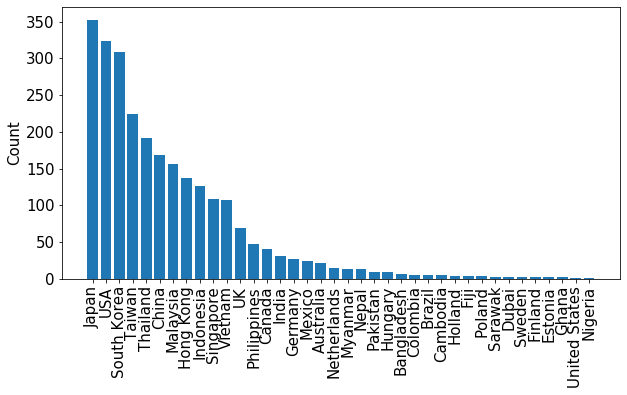

In [150]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.bar(df_sorted.Country,df_sorted.Brand)

**Now I want to see the average ramen rating per country, and also add infomation on how many ramens are produced per country**

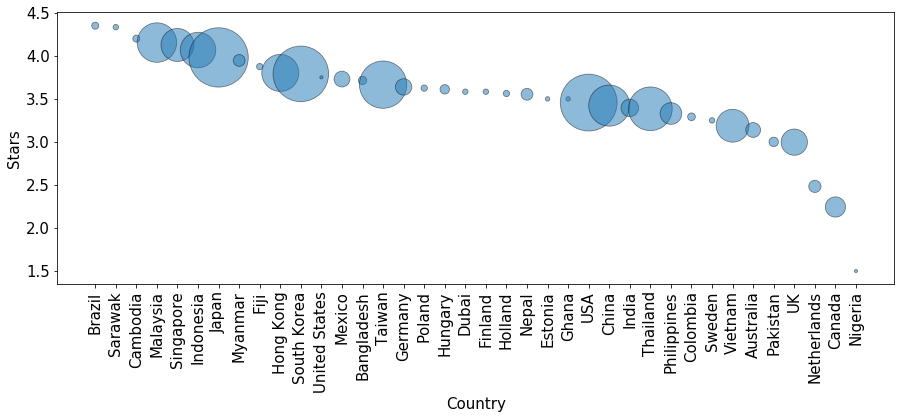

In [151]:
df_ave_stars= df[['Country','Stars']].groupby('Country').mean().sort_values('Stars',ascending=False).reset_index()
df_joined = df_ave_stars.set_index('Country').join(df_sorted.set_index('Country')).reset_index()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
#plt.hist(df_ave_stars.Stars,bins = 15)
plt.ylabel('Average Ramen Rating')
sizes = dict(zip(df_joined.Country,df_joined.Brand.values*10))
sns.scatterplot('Country','Stars', data=df_joined,
                size='Country',
                sizes=sizes,
                legend=False,
                alpha=0.5,
                edgecolor='black',
                palette = 'Set1'
                )


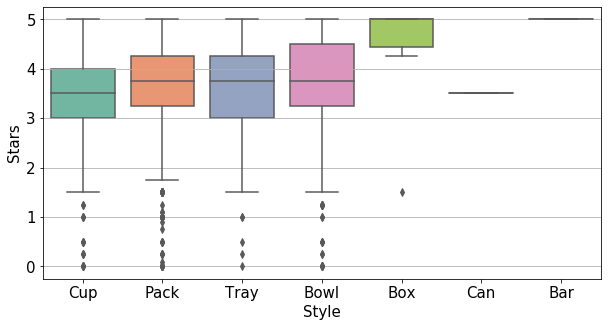

In [152]:
df_ave_stars_style = df[['Style','Stars']].groupby('Style').mean().sort_values('Stars',ascending=False).reset_index()
plt.figure(figsize=(10,5))
#plt.hist(df_ave_stars.Stars,bins = 15)
plt.ylabel('Average Ramen Rating')
plt.grid()
sns.boxplot(df.Style,df.Stars,palette = 'Set2')


# Now to do some feature extraction from the variety column. It would be good to try and get an idea of flavour

**First I need to remove the punctuation**

In [153]:
import string 
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [154]:
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: remove_punctuation(x.lower()))

**Now to remove stopwords such as 'the', 'and' etc...**

In [155]:
from nltk.tokenize import RegexpTokenizer

In [156]:
tokenizer = RegexpTokenizer(r'\w+')
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [157]:
df.Variety

0                             [ts, restaurant, tantanmen]
1       [noodles, spicy, hot, sesame, spicy, hot, sesa...
2                      [cup, noodles, chicken, vegetable]
3                     [gge, ramen, snack, tomato, flavor]
4                                      [singapore, curry]
                              ...                        
2575    [hu, tiu, nam, vang, phnom, penh, style, asian...
2576                  [oriental, style, instant, noodles]
2577                                   [tom, yum, shrimp]
2578                            [tom, yum, chili, flavor]
2579                                        [miso, ramen]
Name: Variety, Length: 2580, dtype: object

In [158]:
from nltk.corpus import stopwords
specified_extra = ['noodles','noodle','flavour','artificial','ramen','instant','flavor','sauce','cup','bowl','rice']
def remove_stopwords(text):
    english_words = [w for w in text if w not in stopwords.words('english')]
    additional_words = [w for w in english_words if w not in specified_extra]
    return additional_words

In [159]:
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: remove_stopwords(x))

**Now to recombine for analysis. I also take the opportunity to remove any repeats in the lists, before recombining**

In [160]:
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: list(set(x)))
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x:" ".join(x))

In [161]:
# Begin vectorisation
from sklearn.feature_extraction.text import CountVectorizer

Specifiy the number of words to list

In [162]:
# Might take awhile...
max_feature_length = 5
top_words = []


Now to generate the sparce matrix with all the top words contained

In [163]:

bow_transformer = CountVectorizer(max_features=max_feature_length,ngram_range=(1,1)).fit(df.loc[:,'Variety'])
bow = bow_transformer.transform([' '.join(df.loc[:,'Variety'].values)])#This joins all the words in all the rows 


Now to extract the top words and counts 

In [164]:

word_list = bow_transformer.get_feature_names()
count_list = bow.toarray().sum(axis=0) 
top_counts = pd.DataFrame(zip(word_list,count_list),columns=['term','count',])
top_counts.sort_values('count',axis=0,inplace=True, ascending=False)




In [165]:
top_counts

,term,count
1,chicken,328
3,spicy,269
0,beef,232
2,soup,196
4,tom,128


Create a new column with the flavours identified

In [166]:
df['flavour'] = df.Variety.apply(lambda y: np.array([x for x in y.split() if x in top_counts.term.values]))

In [167]:
df['flavour'] = df['flavour'].apply(lambda x :" ".join(x))


## Now I have the flavours identified, I want to see how it varies with the rating

First I create a new dataframe, with the flavours spilt and add the rating column 

In [168]:
flavours = df['flavour'].str.split(' ', 3,expand=True)

In [169]:
flavours['stars'] = df['Stars']
flavours.replace('',np.nan,inplace=True)
flavours.replace('tom','tom yum',inplace=True) # Change tom to tom yum 

In [170]:
flavours['flavours'] = flavours.iloc[:,0]

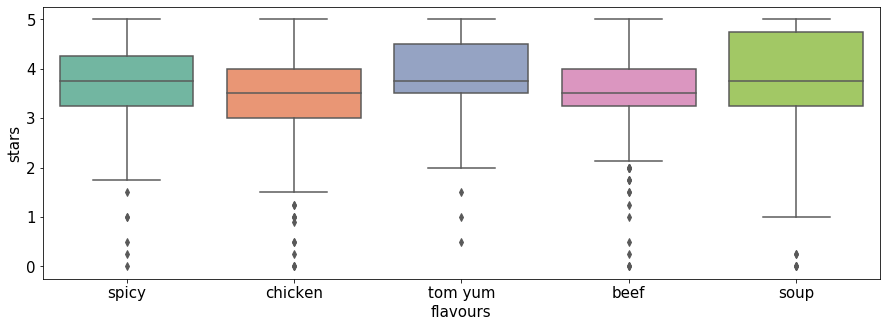

In [171]:
plt.figure(figsize=(15,5))
sns.boxplot('flavours','stars',data=flavours, palette = 'Set2')

**It seems that curry noodles are often rated highly. Seafood and shrimp along with chicken seem to be generally worse.** Seeing as some rows also have secondary flavours, this could be a great predictor of ratings, along with country, style and brand.

## From here I begin to make dummy variables for the flavour and try and predict the rating.

In [172]:
flavour_dummies = pd.get_dummies(data=styles['Style'],drop_first=True)

**Now to encode the brand, style and country features**

As there are a large number of countries and brands I use the BaseN encoder to reduce the dimentionality. For style I simply use get dummies.

In [212]:
import category_encoders as ce

In [213]:
encoder = ce.BaseNEncoder(cols=['Brand'],return_df=True,base=5)
data_encoded_brand = encoder.fit_transform(df.Brand)

In [214]:
encoder = ce.BaseNEncoder(cols=['Country'],return_df=True,base=5)
data_encoded_Country = encoder.fit_transform(df.Country)

In [215]:
data_encoded_styles = pd.get_dummies(data=df.Style,drop_first=True)

In [216]:
clean_df = df.drop(['Variety','Brand','Style','Country','Top Ten','flavour'],axis=1)

In [246]:
final_cleaned = clean_df.join(data_encoded_brand).join(data_encoded_styles).join(data_encoded_Country)

Now to check that all columns are numeric and ready to be used in prediction

In [247]:
final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Stars      2577 non-null   float64
 1   Brand_0    2580 non-null   int64  
 2   Brand_1    2580 non-null   int64  
 3   Brand_2    2580 non-null   int64  
 4   Brand_3    2580 non-null   int64  
 5   Brand_4    2580 non-null   int64  
 6   Bowl       2580 non-null   uint8  
 7   Box        2580 non-null   uint8  
 8   Can        2580 non-null   uint8  
 9   Cup        2580 non-null   uint8  
 10  Pack       2580 non-null   uint8  
 11  Tray       2580 non-null   uint8  
 12  Country_0  2580 non-null   int64  
 13  Country_1  2580 non-null   int64  
 14  Country_2  2580 non-null   int64  
 15  Country_3  2580 non-null   int64  
dtypes: float64(1), int64(9), uint8(6)
memory usage: 216.8 KB


In [248]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [249]:
final_cleaned.dropna(inplace=True)
final_cleaned.dropna(inplace=True)
x = final_cleaned.iloc[:,1:15]
y = final_cleaned.iloc[:,0].values

In [250]:
 x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.33,)

In [251]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [237]:
from sklearn.linear_model import LinearRegression

In [252]:
model = LinearRegression().fit(x_train, y_train)

In [253]:
y_predict = model.predict(x_test)

(-0.5, 5.5)

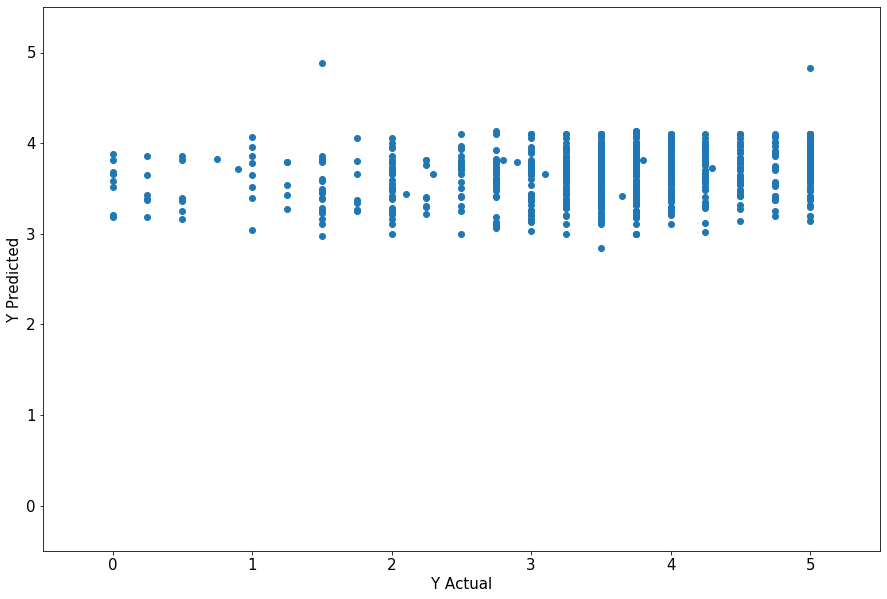

In [254]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict)
plt.xlim([-0.5,5.5])
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.ylim([-0.5,5.5])

In [241]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [242]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred = model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.252491348061244
RMSE value for k=  2 is: 1.1108062206133127
RMSE value for k=  3 is: 1.0249803752034283
RMSE value for k=  4 is: 0.9954286718156846
RMSE value for k=  5 is: 0.971825876721288
RMSE value for k=  6 is: 0.9678494412690839
RMSE value for k=  7 is: 0.98041316854411
RMSE value for k=  8 is: 0.9832833521769457
RMSE value for k=  9 is: 0.9705030731445929
RMSE value for k=  10 is: 0.9749764301589308


(-0.5, 5.5)

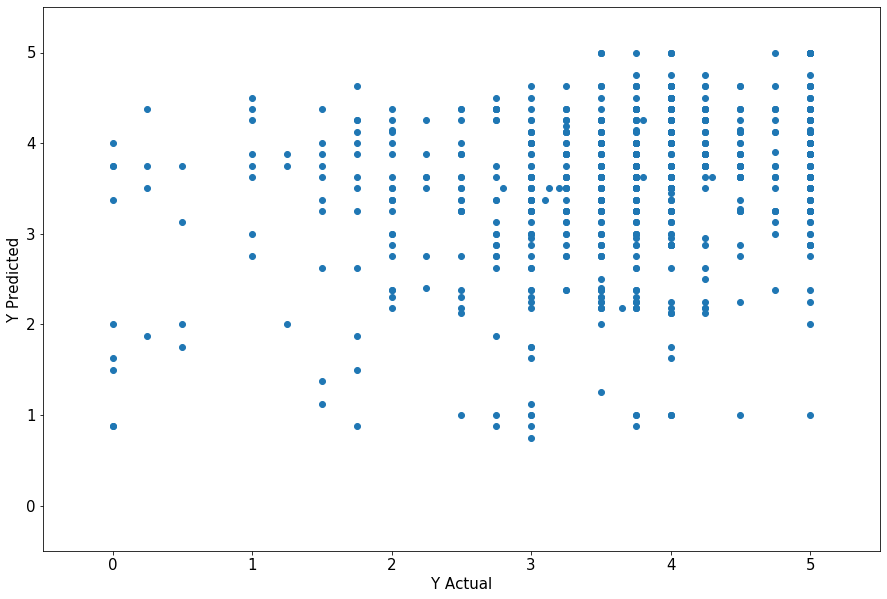

In [243]:
model = neighbors.KNeighborsRegressor(n_neighbors = 2)
model.fit(x_train, y_train)  #fit the model
y_predict_KNN = model.predict(x_test) #make prediction on test set
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict_KNN)
plt.xlim([-0.5,5.5])
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.ylim([-0.5,5.5])

In [244]:
from sklearn.decomposition import PCA
pca = PCA(n_components =0.95) # 0.95 ensures that 95% of the variance is presenved by the output dimensions
x_reduced = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.33633191, 0.23268334, 0.18347709, 0.11272935, 0.0598032 ,
       0.03977715])

Trying linear regression again

(-0.5, 5.5)

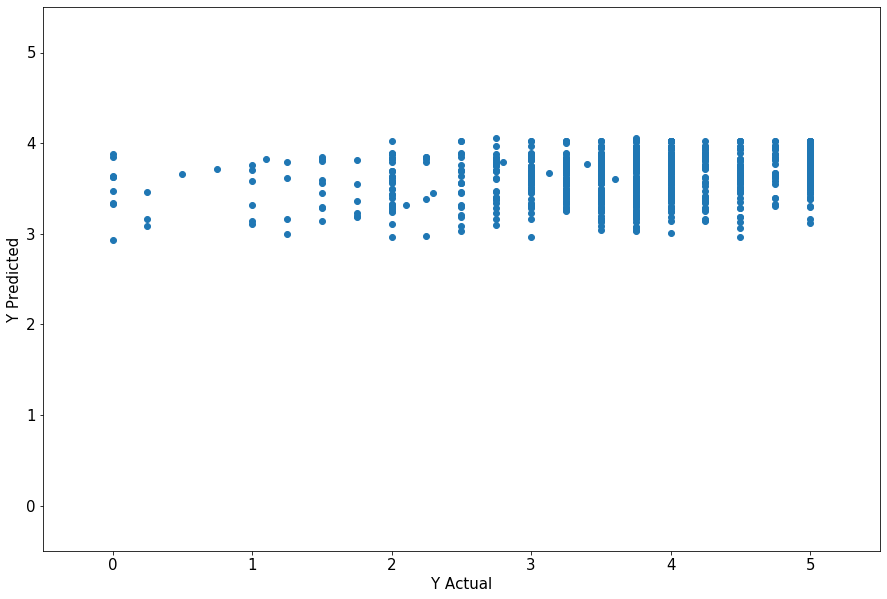

In [245]:
x_train, x_test, y_train,  y_test = train_test_split(x_reduced, y, test_size=0.33,)
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
model = LinearRegression().fit(x_train, y_train)
y_predict = model.predict(x_test)
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict)
plt.xlim([-0.5,5.5])
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.ylim([-0.5,5.5])

In [211]:
final_with_out_flavours = data_encoded_brand.join(data_encoded_styles).join(data_encoded_Country)
final_with_out_flavours['stars'] = clean_df['Stars']